# Examples of use of psychofit toolbox

### Summary:
Example 1: Fit data from 0 to 1 and stimulus in log units, using erf<br>
Example 2: Fit data from 0 to 1 and stimulus in linear units, using erf<br>
Example 3: Same, with two different lapse rates<br>
Example 4: Fit data from .5 to 1, using weibull

### Advanced: 
Add error bars to data, parameters, and fits

In [1]:
import psychofit as psy
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%pdoc psy

## Example 1
Fit data from 0 to 1 and stimulus in log units, using erf 

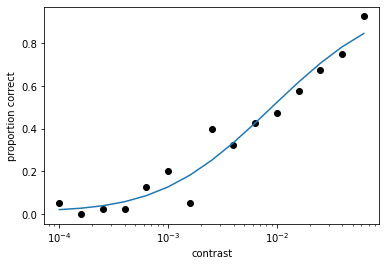

In [2]:
# stimulus values vary logarithmically (we will take the log when fitting)
xx = 10**np.arange(-4, -1, .2)
nxx = xx.size

# actual parameters of the observer
bias = -2.
slope = 1.
lapse = .05

# fake experimental data given those parameters
pp = psy.erf_psycho((bias, slope, lapse), np.log10(xx))
ntrials = 40
dd = np.random.binomial(1, pp, size=(ntrials,nxx))

# data: 
# 3 x n matrix where first row corrsponds to stim levels (log units), 
# the second to number of trials for each stim level (int),
# the third to proportion correct (float between 0 and 1)
data = np.vstack((np.log10(xx), 10 * np.ones((nxx,)), np.mean(dd, axis=0)))
# fit to reconstruct the parameters
pars, L = psy.mle_fit_psycho(data, 'erf_psycho');

plt.semilogx(xx, np.mean(dd, axis=0), 'ko')
plt.semilogx(xx, psy.erf_psycho(pars, np.log10(xx)), '-')
plt.xlabel('contrast')
plt.ylabel('proportion correct')

plt.show()

## Example 2
Fit data from 0 to 1 and stimulus in linear units, using erf

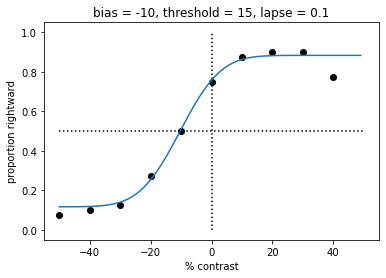

In [3]:
# stimulus values
xx = np.arange(-50, 50, 10)
nxx = xx.size

# actual parameters of the observer
bias = -10.
threshold = 20.
lapse = .1

# fake experimental data given those parameters
pp = psy.erf_psycho((bias, threshold, lapse), xx)
ntrials = 40
dd = np.random.binomial(1, pp, size=(ntrials, nxx))

# Parameter bounds are in the form
# [bias, threshold, lapse]
params = {
    # The minimum allowable parameter values
    'parmin': np.array([-20., 10., 0.]),
    # The maximum allowable parameter values
    'parmax': np.array([20., 40., .3]),
    # Non-zero starting parameters, used to try to avoid local minima
    'parstart': np.array([0., 20., 0.1]),
    # The number of fits to run
    'nfits': 10
}

# data: 
# 3 x n matrix where first row corrsponds to stim levels (% contrast), 
# the second to number of trials for each stim level (int),
# the third to proportion rightward (float between 0 and 1)
data = np.vstack((xx, ntrials * np.ones((nxx,)), np.mean(dd, axis=0)))
pars, L = psy.mle_fit_psycho(data, 'erf_psycho', **params);

# graphics
plt.plot(xx,np.mean(dd, axis=0), 'ko', mfc='k')
plt.plot((0, 0), (0, 1), 'k:')
plt.plot(np.arange(-50, 50), psy.erf_psycho( pars, np.arange(-50, 50) ))
plt.plot((-50, 50), (.5, .5), 'k:')
plt.xlabel('% contrast')
plt.ylabel('proportion rightward')

plt.title('bias = {:2.0f}, threshold = {:2.0f}, lapse = {:.01f}'.format(*pars))
plt.show()

## Example 3
Same as above but with two different lapse rates

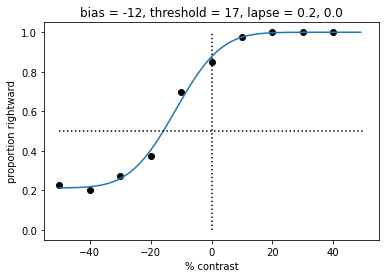

In [4]:
# stimulus values
xx = np.arange(-50, 50, 10)
nxx = xx.size

# actual parameters of the observer
bias = -10.
threshold = 20.
gamma1 = .2
gamma2 = 0.

# fake experimental data given those parameters
pp = psy.erf_psycho_2gammas((bias, threshold, gamma1, gamma2), xx)
ntrials = 40
dd = np.random.binomial(1, pp, size=(ntrials, nxx))

# Parameter bounds are in the form
# [bias, threshold, lapse_low, lapse_high]
params = {
    # The minimum allowable parameter values
    'parmin': np.array([-20., 10., 0., 0.]),
    # The maximum allowable parameter values
    'parmax': np.array([20., 40., .3, .3]),
    # Non-zero starting parameters, used to try to avoid local minima
    'parstart': np.array([0., 20., .1, .1]),
    # The number of fits to run
    'nfits': 10
}

# data: 
# 3 x n matrix where first row corrsponds to stim levels (% contrast), 
# the second to number of trials for each stim level (int),
# the third to proportion rightward (float between 0 and 1)
data = np.vstack((xx, ntrials * np.ones((nxx,)), np.mean(dd, axis=0)))
pars, L = psy.mle_fit_psycho(data, 'erf_psycho_2gammas', **params);

# graphics
plt.plot(xx, np.mean(dd, axis=0), 'ko', mfc='k')
plt.plot((0, 0), (0, 1), 'k:')
plt.plot(np.arange(-50, 50), psy.erf_psycho_2gammas( pars, np.arange(-50,50) ))
plt.plot((-50, 50), (0.5, 0.5), 'k:')
plt.xlabel('% contrast')
plt.ylabel('proportion rightward')

plt.title('bias = {:2.0f}, threshold = {:2.0f}, lapse = {:.01f}, {:.01f}'.format(*pars))
plt.show()

## Example 4
Fit data from .5 to 1, using Weibull

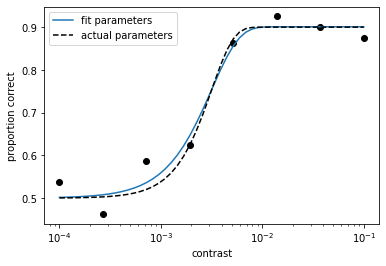

In [5]:
# stimulus values
nxx = 8
xx = 10**np.linspace(-4, -1, nxx)

# actual parameters of the observer
alpha = 10**-2.5
beta = 2.
gamma = 0.1

# fake experimental data given those parameters
pp = psy.weibull50((alpha, beta, gamma), xx)
ntrials = 80
dd = np.random.binomial(1., pp, size=(ntrials, nxx))

# data: 
# 3 x n matrix where first row corrsponds to stim levels (notice we do NOT take log of x values), 
# the second to number of trials for each stim level (int),
# the third to proportion correct (float between 0 and 1)
data = np.vstack((xx, ntrials * np.ones((nxx,)), np.mean(dd, axis=0)))
# fit to reconstruct the parameters 
pars, L = psy.mle_fit_psycho(data, 'weibull50');

# graphics
many_xx = 10**np.linspace(-4, -1)
plt.semilogx(xx, np.mean(dd, axis=0), 'ko')
plt.semilogx(many_xx, psy.weibull50(pars, many_xx), '-', label='fit parameters')
plt.semilogx(many_xx, psy.weibull50([alpha, beta, gamma], many_xx), 'k--', label='actual parameters')
plt.xlabel('contrast')
plt.ylabel('proportion correct')
plt.legend()
plt.show()